# Aditya Gupta

Data Science & Business Analytics Intern @TSF

Stock Market Prediction using Numerical and Textual Analysis

Objective - Create a hybrid model for stock price or performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines. The stock to analyze and predict is SENSEX (S&P BSE SENSEX)

# Import Libraries

In [49]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Load the first dataset
columns=['Date','Category','News']
ndf = pd.read_csv("india-news-headlines.csv",names=columns)

In [14]:
ndf.head(5)

,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [15]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3650961,20220331,Garment industry jittery over'GST hike'
3650962,20220331,AAP MLAs interfering in work: Councillors
3650963,20220331,Schools organise vax camps for kids
3650964,20220331,Madhya Pradesh CM Shivraj Singh Chouhan promis...


In [16]:
# Load the second dataset
history_df = pd.read_csv("AMZN.csv")
history_df.head(-5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,154.832993,155.933502,153.641006,155.820999,155.820999,61294000
1,2020-12-14,157.149994,159.523499,156.300003,157.848495,157.848495,83116000
2,2020-12-15,159.050507,159.425003,156.524506,158.255997,158.255997,66390000
3,2020-12-16,158.800507,162.350006,158.184006,162.048004,162.048004,88552000
4,2020-12-17,162.500000,163.175507,161.050003,161.804001,161.804001,69486000
...,...,...,...,...,...,...,...
493,2022-11-28,93.930000,96.400002,93.430000,93.949997,93.949997,74943100
494,2022-11-29,94.040001,94.410004,91.440002,92.419998,92.419998,65567300
495,2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102628200
496,2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000


## Common Dataset Exploration

In [18]:
# Check for common information of the first dataset
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 55.7+ MB


In [19]:
# Group the headlines for each day
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x))
ndf = ndf.drop_duplicates()
ndf.reset_index(inplace=True,drop=True)

In [20]:
ndf

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,I will not give in to trends: Dossmode The tim...


In [21]:
# Check for any duplicated values
ndf.isnull().sum()

Date    0
News    0
dtype: int64

In [22]:
len(ndf)

7717

In [23]:
history_df=history_df[["Date", "Open", "High", "Low", "Close", "Volume"]]
history_df.head(-5)

,Date,Open,High,Low,Close,Volume
0,2020-12-11,154.832993,155.933502,153.641006,155.820999,61294000
1,2020-12-14,157.149994,159.523499,156.300003,157.848495,83116000
2,2020-12-15,159.050507,159.425003,156.524506,158.255997,66390000
3,2020-12-16,158.800507,162.350006,158.184006,162.048004,88552000
4,2020-12-17,162.500000,163.175507,161.050003,161.804001,69486000
...,...,...,...,...,...,...
493,2022-11-28,93.930000,96.400002,93.430000,93.949997,74943100
494,2022-11-29,94.040001,94.410004,91.440002,92.419998,65567300
495,2022-11-30,92.470001,96.540001,91.529999,96.540001,102628200
496,2022-12-01,96.989998,97.230003,94.919998,95.500000,68488000


In [24]:
# Check for common information of the second dataset
history_df["Date"]= pd.to_datetime(history_df["Date"])
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    503 non-null    datetime64[ns]
 1   Open    503 non-null    float64       
 2   High    503 non-null    float64       
 3   Low     503 non-null    float64       
 4   Close   503 non-null    float64       
 5   Volume  503 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.7 KB


In [25]:
history_df.describe()

,Open,High,Low,Close,Volume
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,148.898531,150.789520,146.842690,148.758385,7.184538e+07
std,25.262041,25.088401,25.452122,25.289213,2.943764e+07
min,88.339996,89.480003,85.870003,86.139999,2.903800e+07
25%,127.819999,130.324997,125.884998,127.165001,5.272800e+07
50%,158.649994,160.399994,156.654999,158.917496,6.492660e+07
75%,167.516251,168.821503,165.428001,167.294251,8.264700e+07
max,187.199997,188.654007,184.839493,186.570496,2.726620e+08


In [26]:
# Check for duplicated values
history_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [27]:
len(history_df)

503

Text(0, 0.5, 'AMZN')

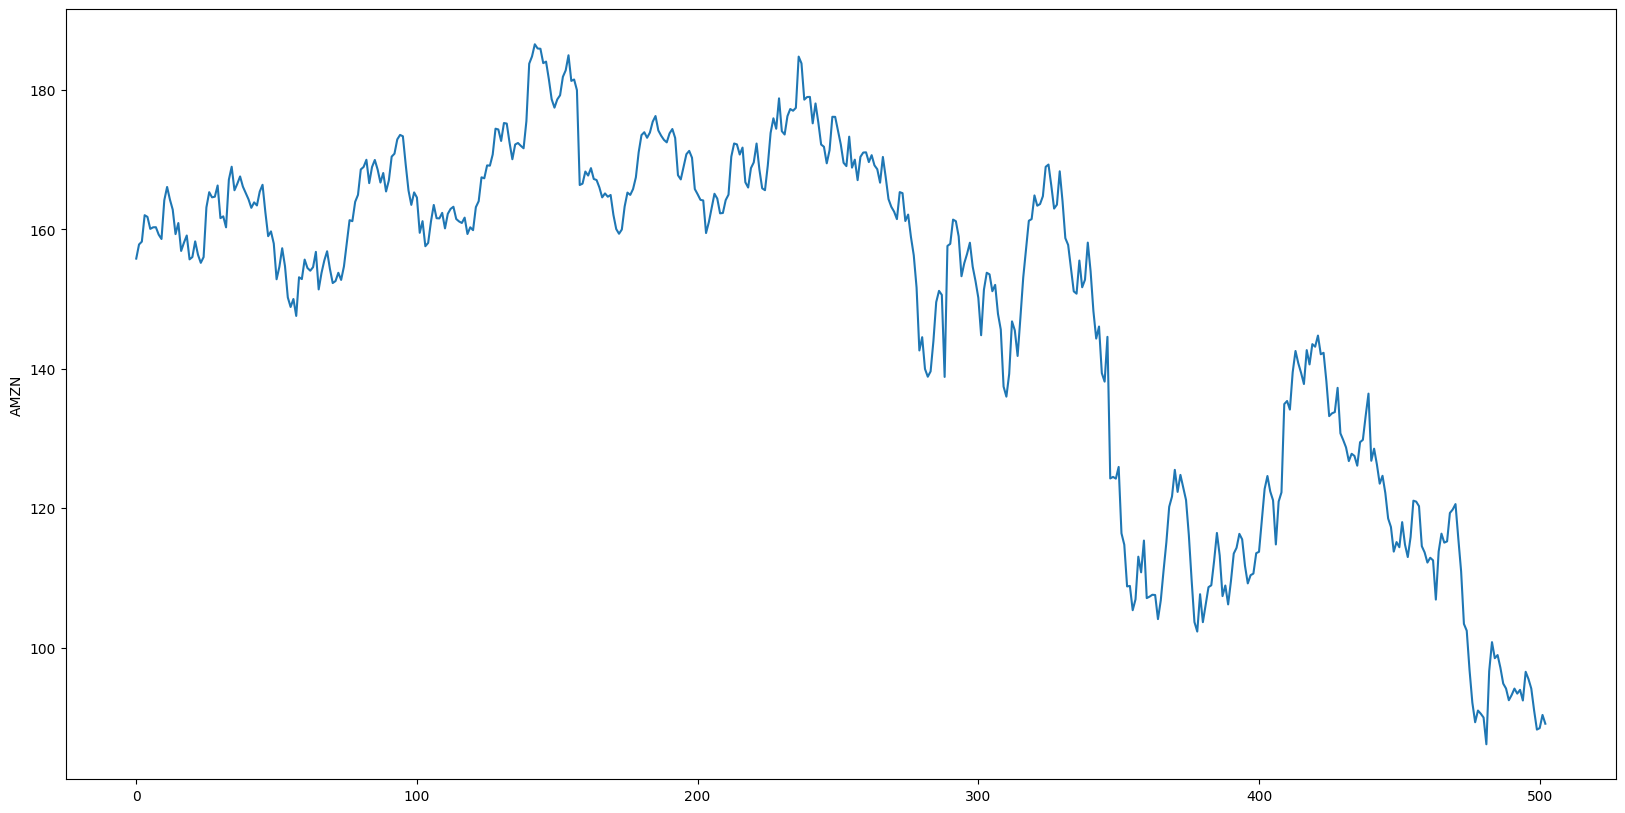

In [76]:
# Figure plot
plt.figure(figsize=(20,10))
history_df['Close'].plot()
plt.ylabel('AMZN')

## Remove Unwanted Characters from the News

In [30]:
#removing unwanted characters from the News
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

## Historical Analysis

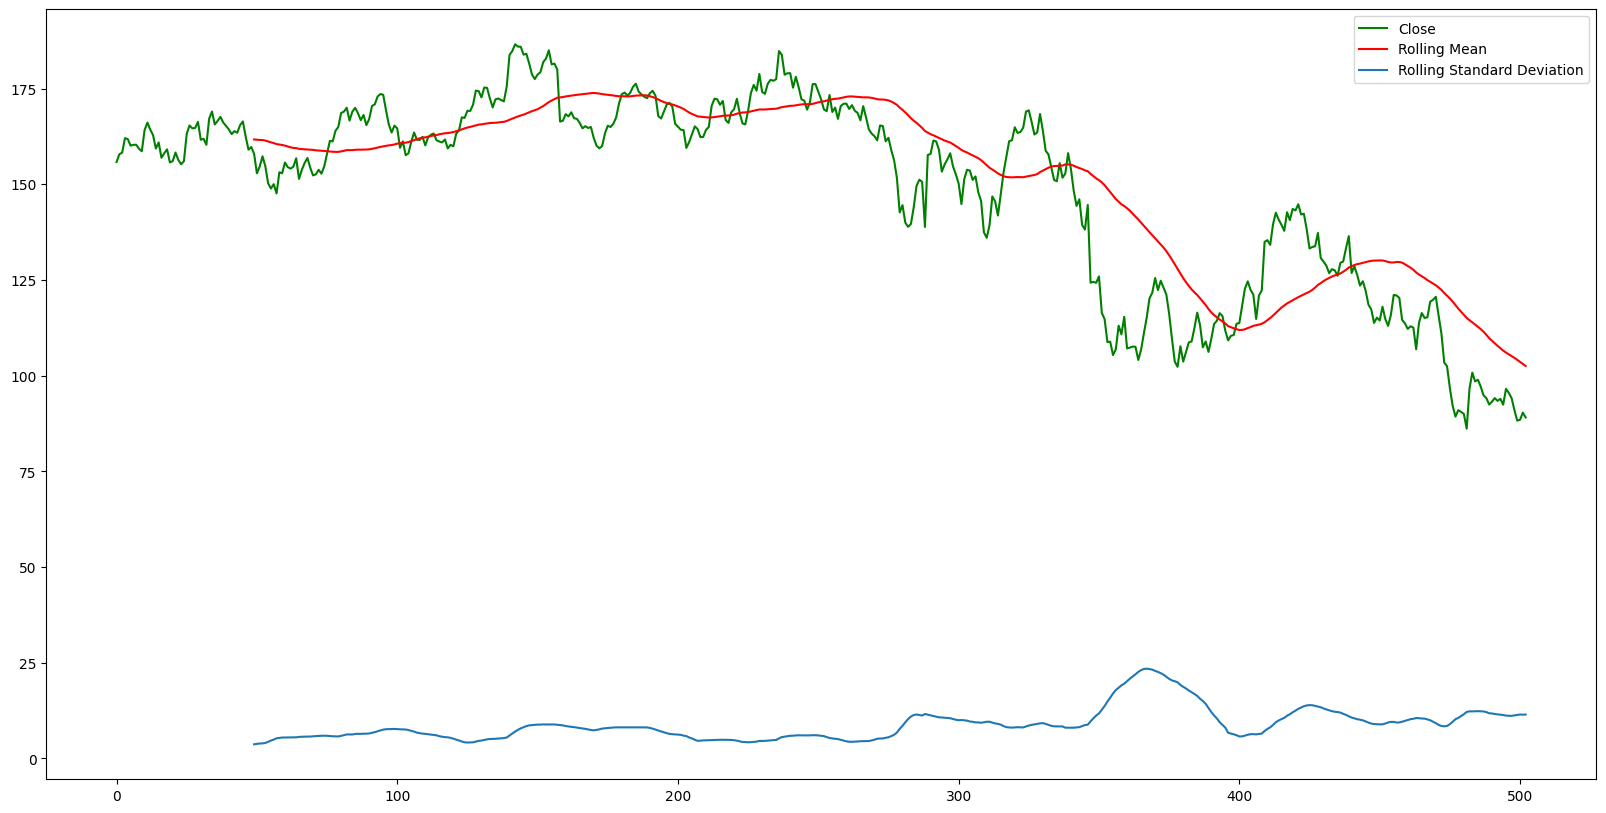

In [32]:
#Plotting moving average
close = history_df['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
history_df['Close'].plot(color='g', label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

Text(0.5, 1.0, 'Returns')

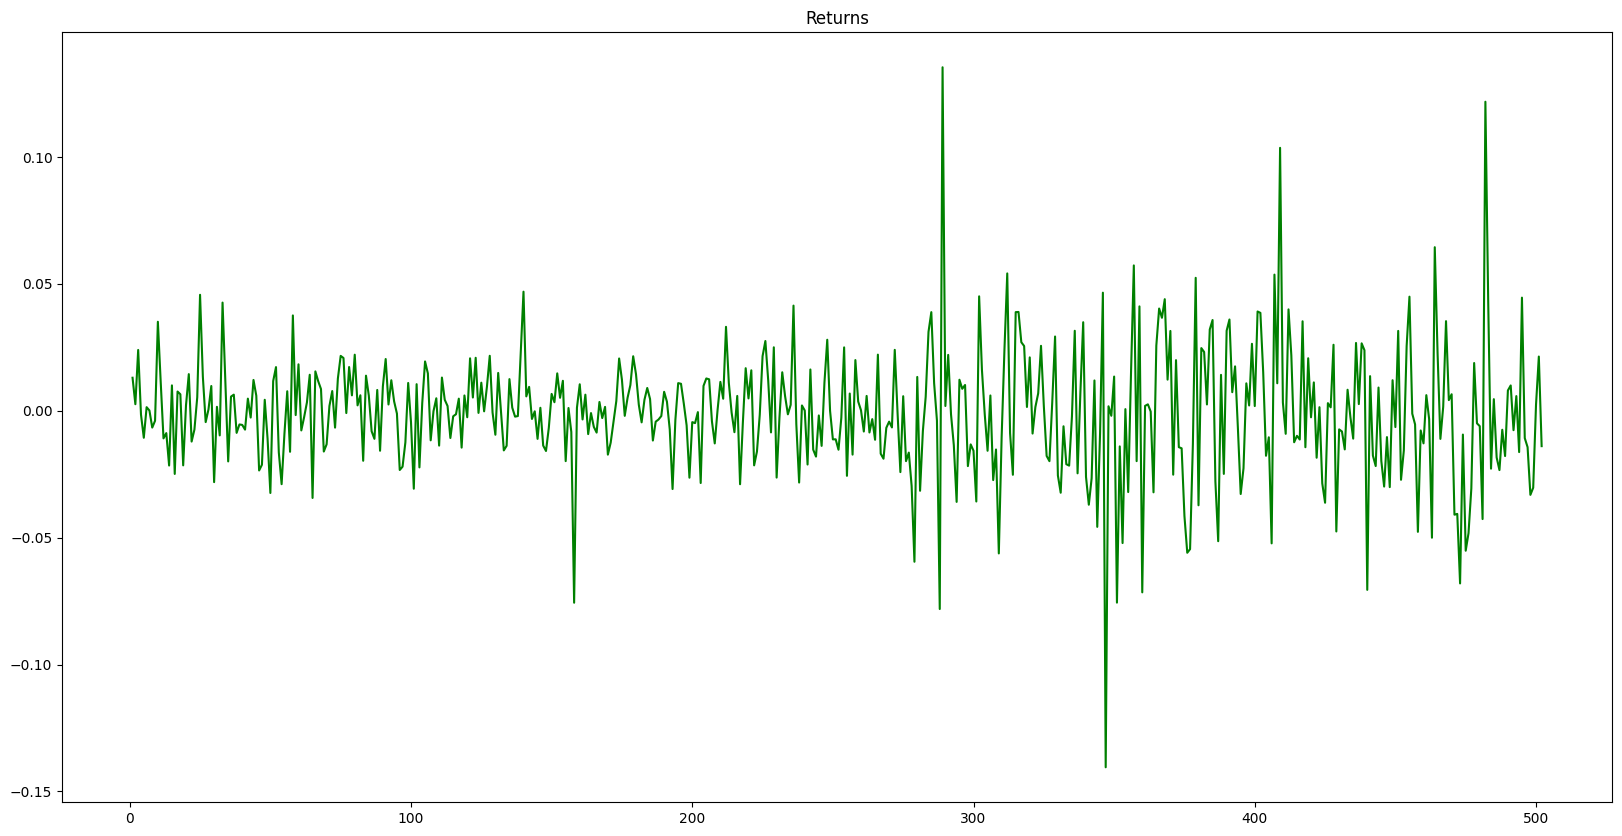

In [33]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")


In [34]:
# Train test split
train = history_df[:1219]
test = history_df[1219:]

## Rolling mean and Standard Deviation

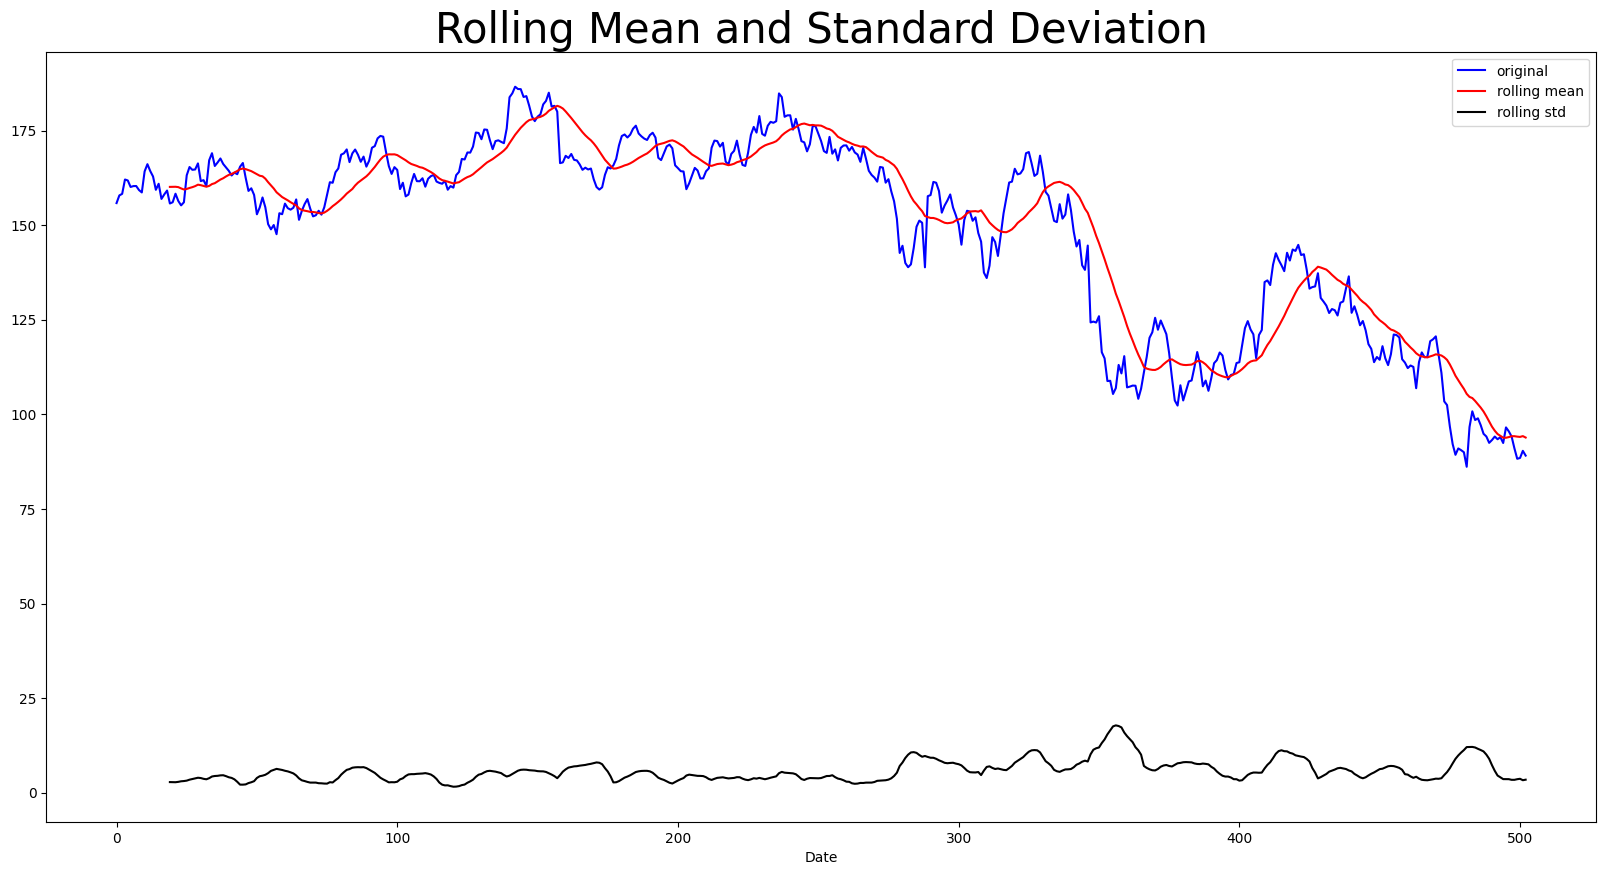

Results of dickey fuller test
ADF Test Statistic : -0.5545887183629467
p-value : 0.8809165703820416
#Lags Used : 0
Number of Observations Used : 502
Weak evidence against null hypothesis, time series is non-stationary 


In [36]:
from statsmodels.tsa.stattools import adfuller

#Stationarity test
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)

 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

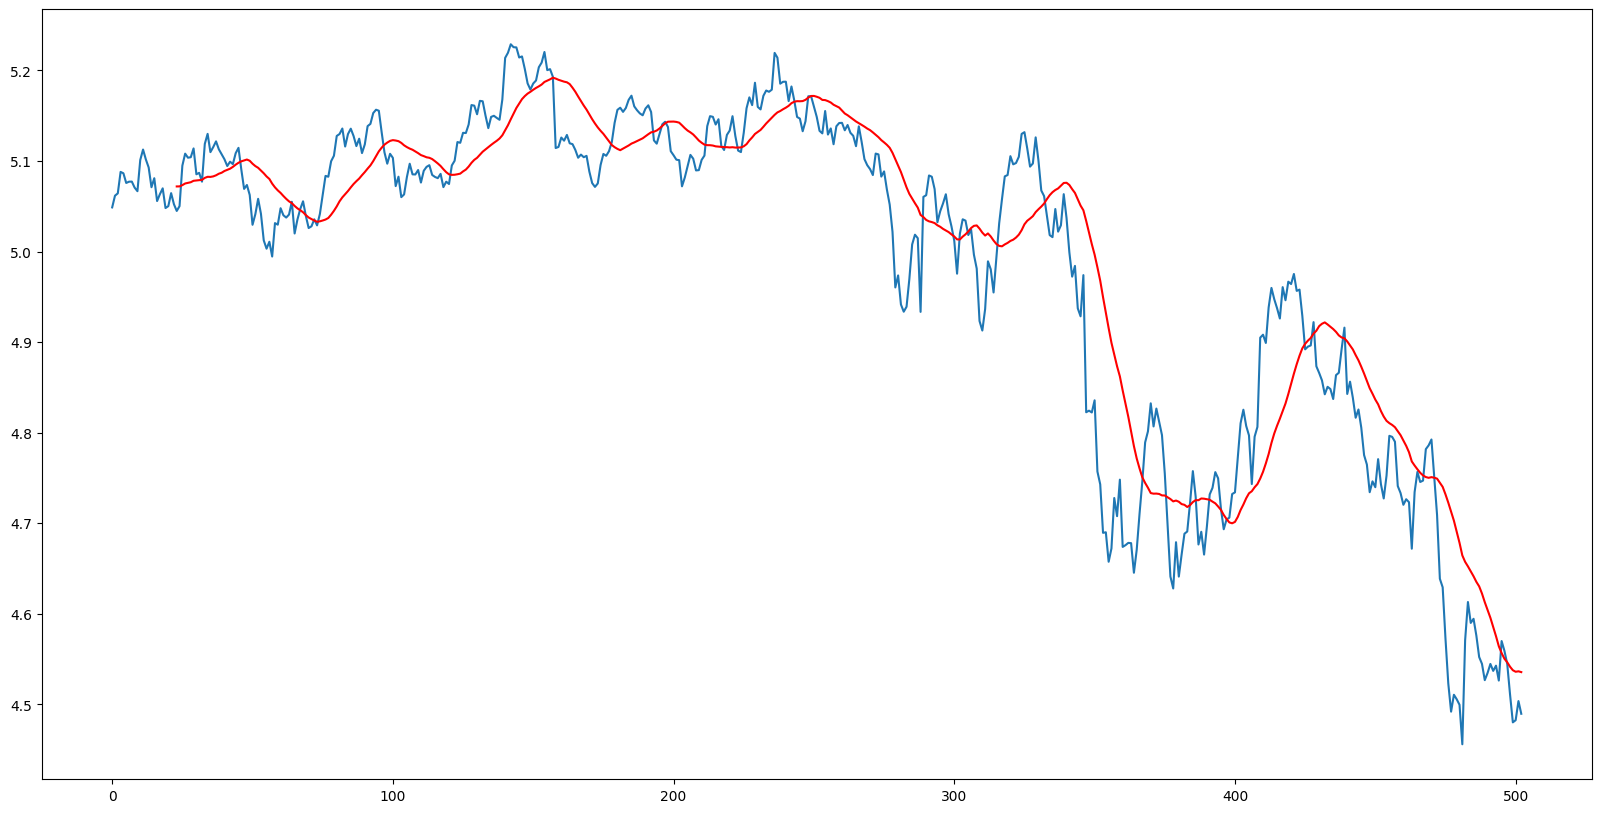

In [37]:
train_log = np.log(train['Close'])
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean()
plt.figure(figsize = (20,10))
plt.plot(train_log)
plt.plot(mav, color = 'red')

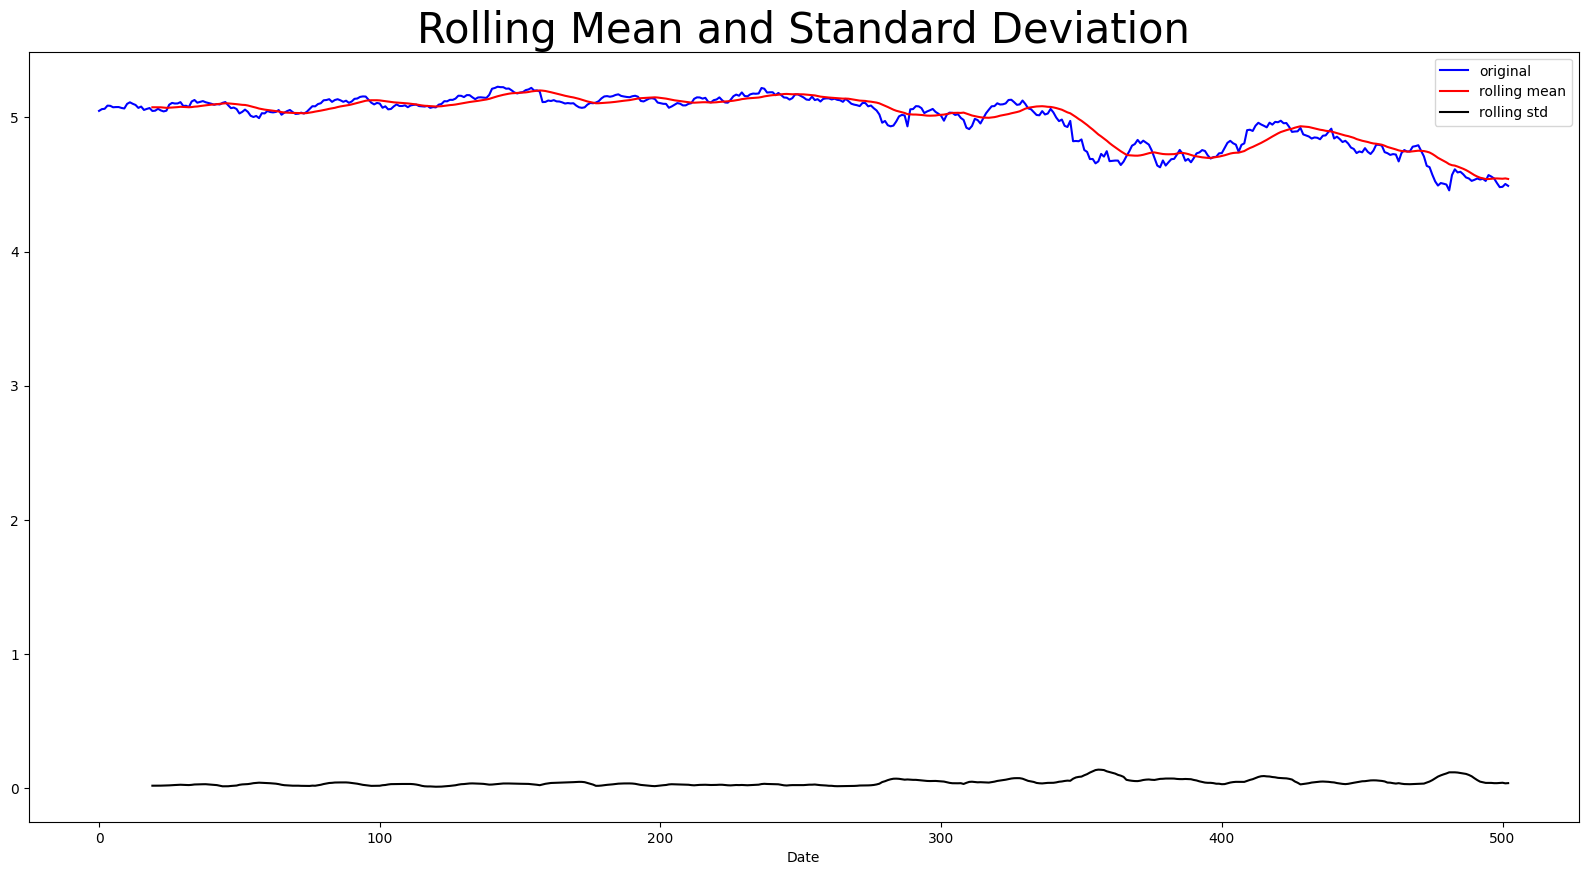

Results of dickey fuller test
ADF Test Statistic : -0.2987470023162429
p-value : 0.92568160680089
#Lags Used : 0
Number of Observations Used : 502
Weak evidence against null hypothesis, time series is non-stationary 


In [38]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

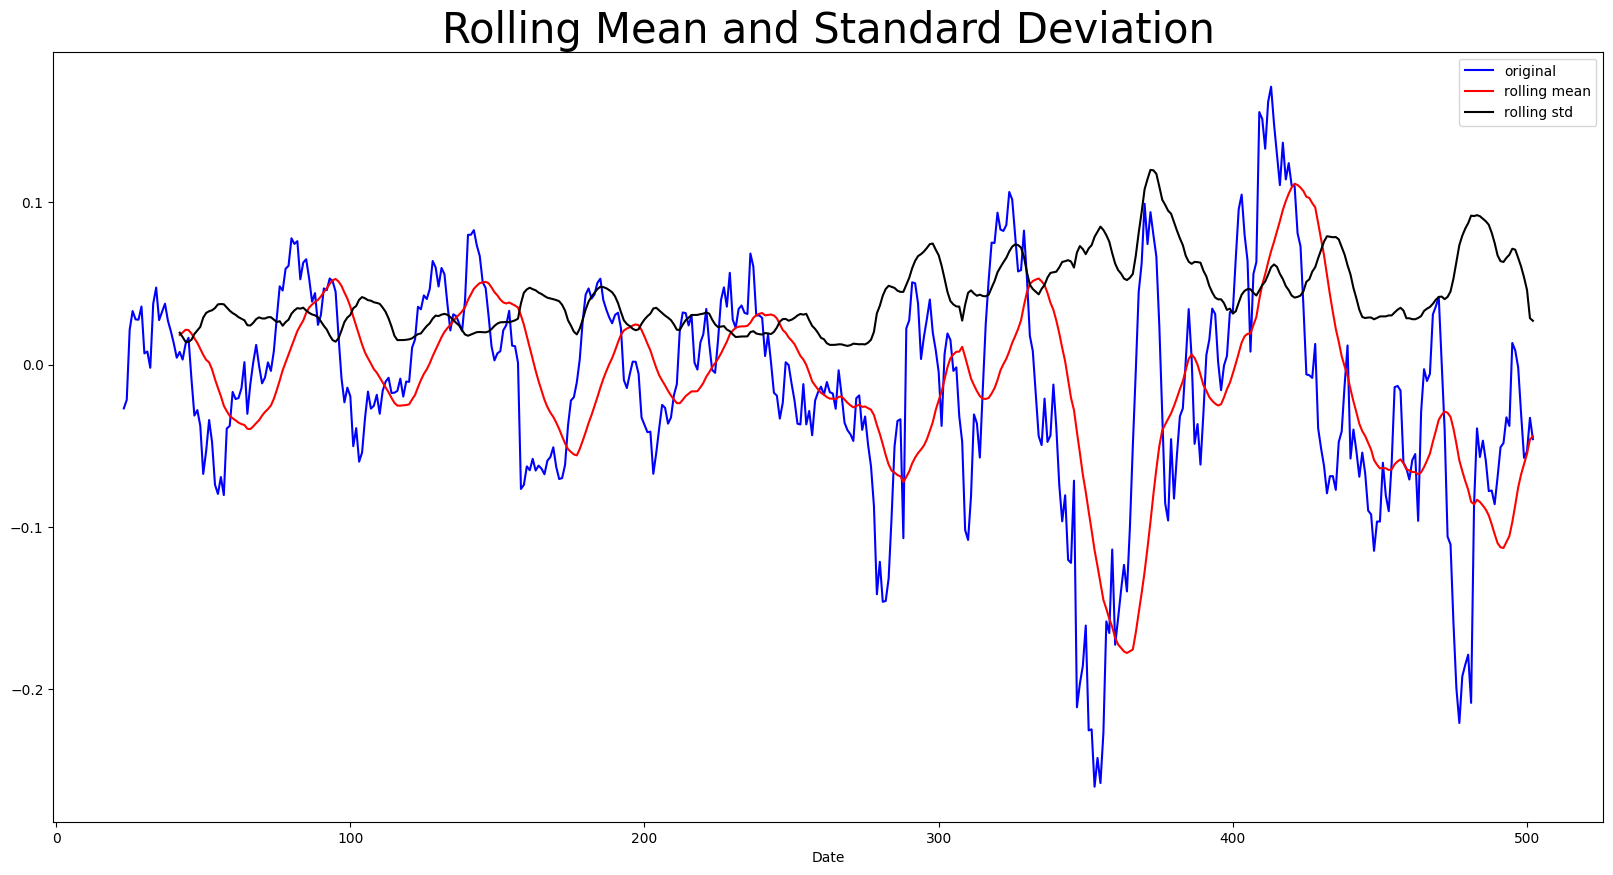

Results of dickey fuller test
ADF Test Statistic : -4.561494933384647
p-value : 0.00015200763576410196
#Lags Used : 2
Number of Observations Used : 477
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [39]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [40]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima

model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2283.632, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2290.386, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2288.581, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2288.565, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2291.360, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2286.575, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.713 seconds


Text(0, 0.5, 'Actual Stock Price')

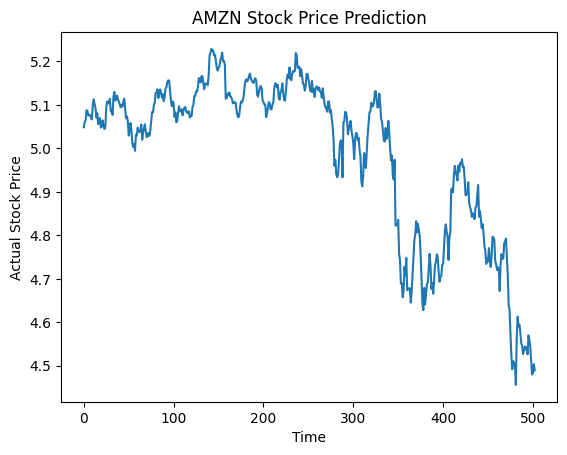

In [53]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

## Textual Analysis

In [45]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [46]:
#Adding subjectivity and polarity columns
ndf['Subjectivity'] = ndf['News'].apply(getSubjectivity)
ndf['Polarity'] = ndf['News'].apply(getPolarity)
ndf

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954


In [50]:
#Adding sentiment score to ndf
sia = SentimentIntensityAnalyzer()

In [51]:
ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['News']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['News']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['News']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['News']]
ndf

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.121,0.809,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.156,0.735,0.109
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.104,0.792,0.104
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9645,0.142,0.694,0.164
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.214,0.655,0.131
...,...,...,...,...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162,-0.9999,0.158,0.758,0.084
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.9999,0.160,0.737,0.103
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,-0.9999,0.159,0.755,0.086
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954,-0.9999,0.156,0.769,0.076


## Merge the Historical and Textual Data

In [54]:
df_merge = pd.merge(history_df, ndf, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Volume,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-12-11,154.832993,155.933502,153.641006,155.820999,61294000,Ways to get you in the mood for sex when you'r...,0.374037,0.052291,-0.9999,0.168,0.743,0.089
1,2020-12-14,157.149994,159.523499,156.300003,157.848495,83116000,No threat from Covid claims to balance sheets ...,0.382335,0.072333,-0.9996,0.128,0.776,0.095
2,2020-12-15,159.050507,159.425003,156.524506,158.255997,66390000,RT PCR tests in a day only found ve ...,0.368751,0.039336,-0.9999,0.145,0.767,0.089
3,2020-12-16,158.800507,162.350006,158.184006,162.048004,88552000,Asmita Sood's favourite holiday destinations a...,0.427681,0.067088,-0.9997,0.124,0.793,0.083
4,2020-12-17,162.500000,163.175507,161.050003,161.804001,69486000,Horoscope Today December Check astro...,0.368514,0.046831,-0.9998,0.132,0.784,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2022-03-25,164.000000,165.368500,162.250000,164.773499,49032000,Speeding up shortcuts and tackling unruly cus...,0.373221,-0.003922,-1.0000,0.184,0.742,0.074
324,2022-03-28,164.975006,169.037506,164.899994,168.990494,59854000,As fashion becomes democratic demand for styl...,0.383007,0.058513,-0.9999,0.160,0.737,0.103
325,2022-03-29,170.384003,170.831497,167.868500,169.315002,66154000,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144,-0.9999,0.159,0.755,0.086
326,2022-03-30,168.509506,168.950500,165.500000,166.300995,56168000,I will not give in to trends Dossmode The tim...,0.344136,0.039954,-0.9999,0.156,0.769,0.076


## Create Dataset for Model Training

In [56]:
final_df = df_merge[['Close', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
final_df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,155.820999,0.374037,0.052291,-0.9999,0.168,0.743,0.089
1,157.848495,0.382335,0.072333,-0.9996,0.128,0.776,0.095
2,158.255997,0.368751,0.039336,-0.9999,0.145,0.767,0.089
3,162.048004,0.427681,0.067088,-0.9997,0.124,0.793,0.083
4,161.804001,0.368514,0.046831,-0.9998,0.132,0.784,0.084
...,...,...,...,...,...,...,...
323,164.773499,0.373221,-0.003922,-1.0000,0.184,0.742,0.074
324,168.990494,0.383007,0.058513,-0.9999,0.160,0.737,0.103
325,169.315002,0.403627,0.092144,-0.9999,0.159,0.755,0.086
326,166.300995,0.344136,0.039954,-0.9999,0.156,0.769,0.076


## Normalize Data

In [58]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(final_df))
df.columns = final_df.columns
df.index = final_df.index
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.391774,0.441517,0.428931,0.00005,0.740741,0.218543,0.475610
1,0.431878,0.515276,0.581084,0.00020,0.370370,0.437086,0.548780
2,0.439938,0.394526,0.330584,0.00005,0.527778,0.377483,0.475610
3,0.514944,0.918382,0.541271,0.00015,0.333333,0.549669,0.402439
4,0.510118,0.392418,0.387479,0.00010,0.407407,0.490066,0.414634


In [59]:
X=df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.441517,0.428931,0.00005,0.740741,0.218543,0.475610
1,0.515276,0.581084,0.00020,0.370370,0.437086,0.548780
2,0.394526,0.330584,0.00005,0.527778,0.377483,0.475610
3,0.918382,0.541271,0.00015,0.333333,0.549669,0.402439
4,0.392418,0.387479,0.00010,0.407407,0.490066,0.414634
...,...,...,...,...,...,...
323,0.434260,0.002176,0.00000,0.888889,0.211921,0.292683
324,0.521256,0.476166,0.00005,0.666667,0.178808,0.646341
325,0.704557,0.731485,0.00005,0.657407,0.298013,0.439024
326,0.175713,0.335271,0.00005,0.629630,0.390728,0.317073


In [60]:
Y=df['Close']
Y

0      0.391774
1      0.431878
2      0.439938
3      0.514944
4      0.510118
         ...   
323    0.568854
324    0.652267
325    0.658686
326    0.599068
327    0.533725
Name: Close, Length: 328, dtype: float64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

(262, 6)

In [62]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1,0.515276,0.581084,0.00020,0.370370,0.437086,0.548780
298,0.440431,0.609861,0.00005,0.592593,0.350993,0.426829
8,0.569506,0.608678,0.00015,0.425926,0.430464,0.500000
213,0.495099,0.241648,0.00005,0.675926,0.317881,0.390244
101,0.730561,0.320692,0.00020,0.388889,0.397351,0.609756
124,0.357825,0.249409,0.00015,0.259259,0.668874,0.280488
284,0.550604,0.239195,0.00010,0.546296,0.317881,0.548780
224,0.457652,0.382652,0.00005,0.509259,0.417219,0.414634
200,0.582441,0.374977,0.00005,0.638889,0.344371,0.378049
5,0.736804,0.264987,0.00005,0.592593,0.264901,0.585366


## RandomForestRegressor Model

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

print('Mean Squared error: ',mean_squared_error(prediction,y_test))

 Mean Squared error: 0.04260498352031086

## DecisionTreeRegressor Model

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

print('Mean Squared error: ',mean_squared_error(predictions,y_test))

 Mean Squared error: 0.07106857807916761

## AdaBoostRegressor Model

In [79]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

0.04332439975272043


# Conclusion

RandomForest = 0.04260498352031086
DecisionTree = 0.07002257377246375
AdaBoost = 0.043856257705300924

As a conclusion, here we can say that 'RandomForestRegressor' shows a better performance than the others